##### Importing necessary Libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import roc_auc_score
import warnings 
warnings.filterwarnings("ignore")

##### Reading the dataset

In [8]:
data = pd.read_csv(r'F:\College docs\Desktop\HighRadius\H2HBABBA3187.csv')
data.shape

(50000, 19)

In [9]:
#displaying first 50 rows
data.head(50)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200761734,H E BUT us,2019-06-13 00:00:00,2019.0,1.929404e+09,2019-05-30,20190530,20190530,20190614.0,USD,RV,1.0,NaN,6416.97,20190530.0,NAA8,1.929404e+09,0
1,U001,0200772670,ASSOCIAT corporation,2019-03-01 00:00:00,2019.0,1.928793e+09,2019-02-13,20190213,20190213,20190228.0,USD,RV,1.0,NaN,156916.50,20190213.0,NAU5,1.928793e+09,0
2,CA02,0140104475,FOC corporation,2020-03-11 00:00:00,2020.0,2.960616e+09,2020-02-20,20200220,20200220,20200310.0,CAD,RV,1.0,NaN,3743.33,20200229.0,CA10,2.960616e+09,0
3,U001,200936373,SUPE llc,2019-07-17 00:00:00,2019.0,1.929556e+09,2019-07-02,20190629,20190702,20190717.0,USD,RV,1.0,NaN,28508.22,20190702.0,NAA8,1.929556e+09,0
4,U001,0200418007,AM associates,2019-08-28 00:00:00,2019.0,1.929726e+09,2019-08-13,20190809,20190813,20190828.0,USD,RV,1.0,NaN,7691.99,20190813.0,NAA8,1.929726e+09,0
5,U001,0200744019,TARG llc,NaN,2020.0,1.930719e+09,2020-03-30,20200329,20200330,20200414.0,USD,RV,1.0,NaN,51605.72,20200330.0,NAA8,1.930719e+09,1
6,U001,0200761734,H E BUT corporation,2019-08-12 00:00:00,2019.0,1.929662e+09,2019-07-27,20190726,20190727,20190811.0,USD,RV,1.0,NaN,12372.50,20190727.0,NAA8,1.929662e+09,0
7,U001,0200207985,BAY llc,2019-09-13 00:00:00,2019.0,1.929466e+09,2019-06-12,20190610,20190612,20190910.0,USD,RV,1.0,NaN,73397.52,20190612.0,NAVM,1.929466e+09,0
8,U001,CCCA02,KRAFT llc,2020-03-27 00:00:00,2020.0,1.930558e+09,2020-02-22,20200221,20200222,20200328.0,USD,RV,1.0,NaN,27162.90,20200222.0,NAG2,1.930558e+09,0
9,U013,0140103278,COS corporation,2020-04-27 00:00:00,2020.0,1.991839e+09,2020-02-16,20200212,20200216,20200416.0,USD,RV,1.0,NaN,3183.14,20200216.0,NAUZ,1.991839e+09,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

##### Checking which all columns have null values

In [11]:
#This line will tell us which all columns have null values greater than 0
[col for col in data.columns if data[col].isnull().sum() > 0]

['clear_date', 'area_business', 'invoice_id']

In [12]:
data=data.drop('area_business',axis=1)

In [13]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data['business_code'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [14]:
#It will show us the total and percentage value of null in each column
missing_data

,Total,Percent
clear_date,10000,0.2000
invoice_id,5,0.0001
business_code,0,0.0000
invoice_currency,0,0.0000
cust_payment_terms,0,0.0000
baseline_create_date,0,0.0000
total_open_amount,0,0.0000
posting_id,0,0.0000
document type,0,0.0000
due_in_date,0,0.0000


##### Date time conversion

In [15]:
import datetime

In [16]:
#to_datetime function is used to convert the datatype into datetime object
data['clear_date']=pd.to_datetime(data.clear_date)

In [17]:
import datetime
data['due_in_date']=data['due_in_date'].astype(int)
data['due_in_date']=pd.to_datetime(data['due_in_date'].astype(str),format='%Y%m%d')

In [18]:
data['baseline_create_date']=data['baseline_create_date'].astype(int)
data['baseline_create_date']=pd.to_datetime(data['baseline_create_date'].astype(str),format='%Y%m%d')

In [19]:
data['document_create_date']=data['document_create_date'].astype(int)
data['document_create_date']=pd.to_datetime(data['document_create_date'].astype(str),format='%Y%m%d')

In [20]:
data['document_create_date.1']=data['document_create_date.1'].astype(int)
data['document_create_date.1']=pd.to_datetime(data['document_create_date.1'].astype(str),format='%Y%m%d')

In [21]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200761734,H E BUT us,2019-06-13,2019.0,1.929404e+09,2019-05-30,2019-05-30,2019-05-30,2019-06-14,USD,RV,1.0,6416.97,2019-05-30,NAA8,1.929404e+09,0
1,U001,0200772670,ASSOCIAT corporation,2019-03-01,2019.0,1.928793e+09,2019-02-13,2019-02-13,2019-02-13,2019-02-28,USD,RV,1.0,156916.50,2019-02-13,NAU5,1.928793e+09,0
2,CA02,0140104475,FOC corporation,2020-03-11,2020.0,2.960616e+09,2020-02-20,2020-02-20,2020-02-20,2020-03-10,CAD,RV,1.0,3743.33,2020-02-29,CA10,2.960616e+09,0
3,U001,200936373,SUPE llc,2019-07-17,2019.0,1.929556e+09,2019-07-02,2019-06-29,2019-07-02,2019-07-17,USD,RV,1.0,28508.22,2019-07-02,NAA8,1.929556e+09,0
4,U001,0200418007,AM associates,2019-08-28,2019.0,1.929726e+09,2019-08-13,2019-08-09,2019-08-13,2019-08-28,USD,RV,1.0,7691.99,2019-08-13,NAA8,1.929726e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200783609,PROFIC in,2019-04-10,2019.0,1.929018e+09,2019-03-25,2019-03-25,2019-03-25,2019-04-09,USD,RV,1.0,8491.79,2019-03-25,NAA8,1.929018e+09,0
49996,U001,0200403651,Y H,2019-02-14,2019.0,1.928714e+09,2019-02-01,2019-01-31,2019-02-01,2019-02-16,USD,RV,1.0,4381.18,2019-02-01,NAA8,1.928714e+09,0
49997,U001,0200706844,WINC llc,2019-07-15,2019.0,1.929543e+09,2019-06-28,2019-06-26,2019-06-28,2019-07-13,USD,RV,1.0,59812.29,2019-06-28,NAA8,1.929543e+09,0
49998,U001,0200726979,BJ'S llc,2019-05-16,2019.0,1.929223e+09,2019-04-29,2019-04-28,2019-04-29,2019-05-14,USD,RV,1.0,158.23,2019-04-29,NAA8,1.929223e+09,0


In [22]:
data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date                      object
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [23]:
#extracting days from due_in_date column
data['Day_due'] = data['due_in_date'].dt.day
data[['due_in_date','Day_due']].head()

,due_in_date,Day_due
0,2019-06-14,14
1,2019-02-28,28
2,2020-03-10,10
3,2019-07-17,17
4,2019-08-28,28


In [24]:
#extracting days from clear_date column
data['Day_clear'] = data['clear_date'].dt.day
data[['clear_date','Day_clear']].head()

,clear_date,Day_clear
0,2019-06-13,13.0
1,2019-03-01,1.0
2,2020-03-11,11.0
3,2019-07-17,17.0
4,2019-08-28,28.0


In [25]:
#Calculating the delay by using the formula diff=clear day-due day
diff=data['Day_clear']-data['Day_due']
data['Delays']=diff

In [26]:
#In invoice_id column there are some null values so we are imputing those null values with the mean value
missing_value= ['invoice_id']
for i in missing_value:
    data.loc[data.loc[:,i].isnull(),i]=data.loc[:,i].mean()

In [27]:
#This will give us the sum of duplicate rows
data.duplicated().sum()

1178

In [28]:
#Then we are dropping those duplicate rows and only keeping the first value
data=data.drop_duplicates(keep='first')

In [29]:
#Here we are sorting our dataset in ascending order with respect to document create date1 column as if we sort our dataset according to date 
#then it will be sorted perfectly
#and also document create date column1 is in the more normalised form than all other dates so thats why I sorted it according to that column
data=data.sort_values('document_create_date.1')

In [30]:
#Here we are renaming our business year column
data.rename(columns={'buisness_year':'business_year'},inplace=True)
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'business_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen',
       'Day_due', 'Day_clear', 'Delays'],
      dtype='object')

In [31]:
#splitting the dataset into variables
main_test=data[data['isOpen']==1]
main_train = data[data.clear_date.notnull()]


In [32]:
#This dataset will only contain null values of clear_date column
main_test

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Day_due,Day_clear,Delays
24468,U001,0200706844,WINC co,NaT,2020.0,1.930571e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,...,RV,1.0,8734.71,2020-02-27,NAA8,1.930571e+09,1,13,NaN,NaN
10250,U001,0200915438,GROC foundation,NaT,2020.0,1.930565e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,...,RV,1.0,8761.37,2020-02-27,NAA8,1.930565e+09,1,13,NaN,NaN
11953,U001,0200777735,NASH foundation,NaT,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-02-27,2020-03-13,...,RV,1.0,44194.05,2020-02-27,NAA8,1.930581e+09,1,13,NaN,NaN
40290,U001,0200706844,WINC llc,NaT,2020.0,1.930579e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,...,RV,1.0,79238.44,2020-02-27,NAA8,1.930579e+09,1,13,NaN,NaN
25525,U001,0200783609,PROFIC corporation,NaT,2020.0,1.930566e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,...,RV,1.0,9665.47,2020-02-27,NAA8,1.930566e+09,1,13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39317,U001,0200763229,MAINES in,NaT,2020.0,1.930915e+09,2020-05-18,2020-05-18,2020-05-18,2020-06-02,...,RV,1.0,21362.82,2020-05-18,NAA8,1.930915e+09,1,2,NaN,NaN
4543,CA02,0140105785,SHOPPE in,NaT,2020.0,2.960636e+09,2020-05-19,2020-05-19,2020-05-19,2020-05-29,...,RV,1.0,1373.60,2020-05-19,CA10,2.960636e+09,1,29,NaN,NaN
19816,U001,0200915438,GROC in,NaT,2020.0,1.930914e+09,2020-05-20,2020-05-18,2020-05-20,2020-06-04,...,RV,1.0,9884.00,2020-05-20,NAA8,1.930914e+09,1,4,NaN,NaN
14671,U001,0200756072,REINHA in,NaT,2020.0,1.930926e+09,2020-05-21,2020-05-21,2020-05-21,2020-06-20,...,RV,1.0,8.00,2020-05-21,NAD5,1.930926e+09,1,20,NaN,NaN


In [33]:
main_train

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Day_due,Day_clear,Delays
15048,CA02,0140104409,LOB systems,2019-12-27,2019.0,9.500000e+09,2019-03-29,2019-03-29,2018-12-28,2019-01-07,...,X2,1.0,539.64,2018-12-28,CA10,2.011826e+09,0,7,27.0,20.0
30709,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,RV,1.0,22060.83,2018-12-30,NAH4,1.928541e+09,0,14,9.0,-5.0
18714,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,RV,1.0,54975.73,2018-12-30,NAH4,1.928534e+09,0,14,9.0,-5.0
45007,CA02,0140104409,LOB associates,2019-01-11,2019.0,2.960521e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-10,...,RV,1.0,255978.52,2018-12-31,CA10,2.960521e+09,0,10,11.0,1.0
18694,U001,0200769623,WAL-MAR us,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,RV,1.0,25563.69,2018-12-30,NAH4,1.928542e+09,0,14,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22922,CA02,0140105847,GORDON F,2020-03-13,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-16,...,RV,1.0,964.74,2020-03-06,CA10,2.960617e+09,0,16,13.0,-3.0
46193,U001,0200759878,SA in,2020-03-16,2020.0,1.930566e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,...,RV,1.0,35147.76,2020-02-27,NAH4,1.930566e+09,0,13,16.0,3.0
27436,U001,0200739044,PERFOR corporation,2020-03-16,2020.0,1.930574e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,...,RV,1.0,25143.02,2020-02-27,NAA8,1.930574e+09,0,13,16.0,3.0
31281,U001,0200794332,COST in,2020-03-12,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,...,RV,1.0,13720.67,2020-02-27,NAAX,1.930577e+09,0,13,12.0,-1.0


### Splitting the main_train dataset into train, test and validation

In [34]:
#Firstly we are consisdering two variables X and Y in which X will contain the whole train dataset except target variable that is delay column 
#And Y will contain only the delays
#Then we are splitting our train set to X_train and X_inter_test similarly for Y also
#Then we are splitting X_inter_test further into X_test and X_val with test size as 0.5

In [35]:
X=main_train.drop(["Delays"],axis=1)

In [36]:
Y=main_train['Delays']

In [37]:
X_train,X_inter_test,Y_train,Y_inter_test=train_test_split(X,Y,test_size=0.30,random_state=0,shuffle=False)

In [38]:
X_val,X_test,Y_val,Y_test=train_test_split(X_inter_test,Y_inter_test,test_size=0.50,random_state=0,shuffle=False)

In [39]:
X_train.shape,X_val.shape,X_test.shape

((27385, 20), (5868, 20), (5869, 20))

##### Performing exploratory data analysis on X_train data

In [40]:
#displaying the delay column
Y_train

15048    20.0
30709    -5.0
18714    -5.0
45007     1.0
18694     1.0
         ... 
37514     0.0
39440     7.0
41523     0.0
470       0.0
4238      0.0
Name: Delays, Length: 27385, dtype: float64

<Axes: xlabel='Delays', ylabel='Density'>

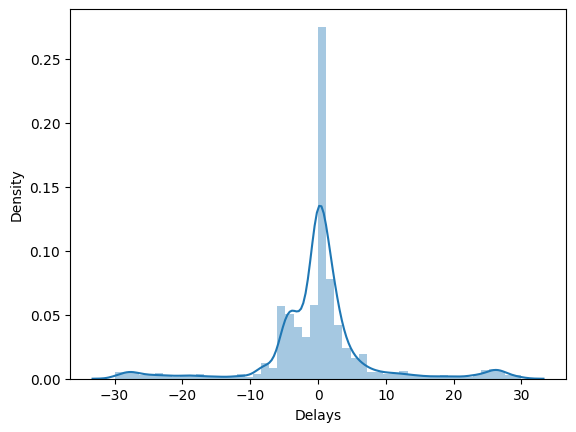

In [41]:
#to see distribution of Y_train
sns.distplot(Y_train)

<Axes: >

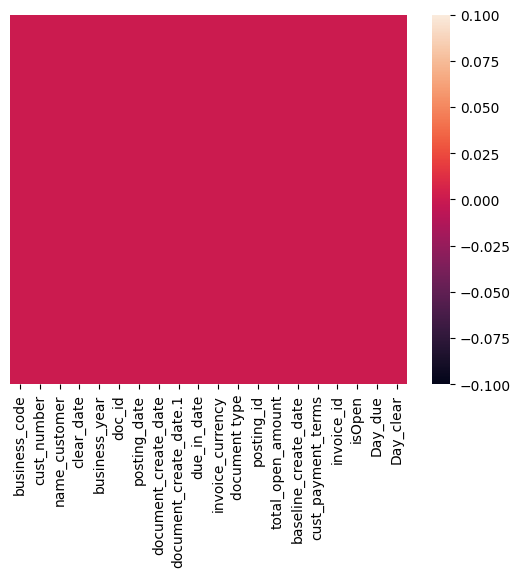

In [42]:
sns.heatmap(X_train.isnull(),yticklabels=False)

From this plot we can see that there are no null values in our dataset if there were null values then there would be different colour lines for that particular column

<Axes: xlabel='Delays', ylabel='Count'>

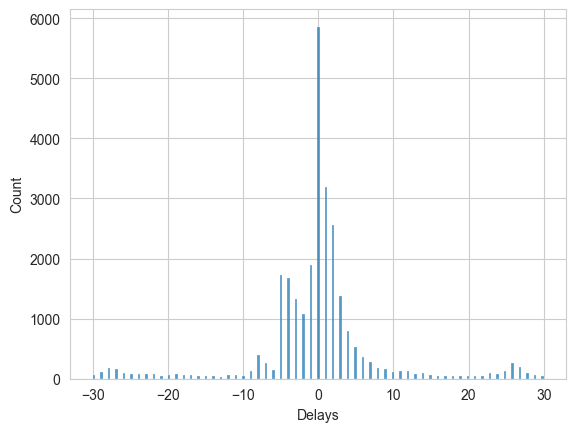

In [43]:
plot=X_train.merge(Y_train,on=X_train.index)
sns.set_style('whitegrid')
sns.histplot(x='Delays',data=plot)

From this plot we can see that in Delays column the maximum value count is when the delay is zero .

<Axes: xlabel='Delays', ylabel='due_in_date'>

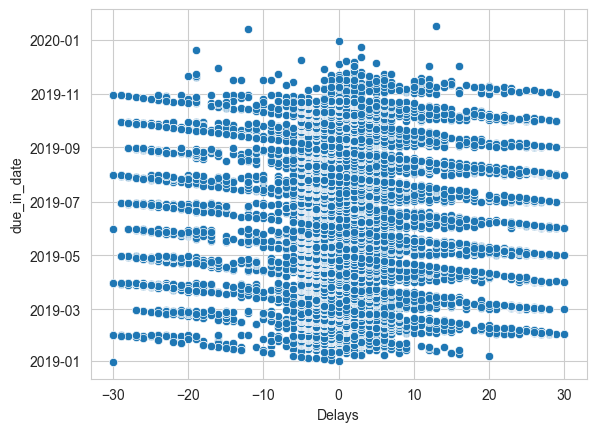

In [44]:
sns.scatterplot(data=X_train.merge(Y_train,on=X_train.index), x='Delays',y='due_in_date')

From this graph we can observe that delay and due in date are not directly proportional rather they are just constant.

<Axes: xlabel='due_in_date', ylabel='clear_date'>

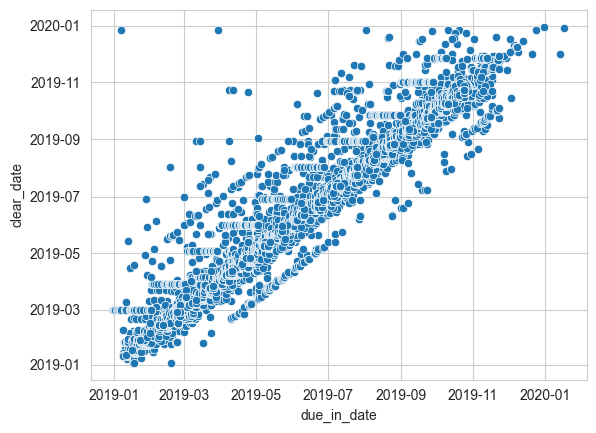

In [45]:
sns.scatterplot(data=X_train.merge(Y_train,on=X_train.index), x='due_in_date',y='clear_date')

### Feature engineering
#### It is the process of converting raw data into features so that our algorithm can understand
#### Steps that we are doing-
1.First we are converting the object and datetime datatype to float or int.
2.After that we are label encoding all the columns that do not have numeric values as model can only read numeric values.

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27385 entries, 15048 to 4238
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27385 non-null  object        
 1   cust_number             27385 non-null  object        
 2   name_customer           27385 non-null  object        
 3   clear_date              27385 non-null  datetime64[ns]
 4   business_year           27385 non-null  float64       
 5   doc_id                  27385 non-null  float64       
 6   posting_date            27385 non-null  object        
 7   document_create_date    27385 non-null  datetime64[ns]
 8   document_create_date.1  27385 non-null  datetime64[ns]
 9   due_in_date             27385 non-null  datetime64[ns]
 10  invoice_currency        27385 non-null  object        
 11  document type           27385 non-null  object        
 12  posting_id              27385 non-null  float64 

##### Label encoding

In [47]:
from sklearn.preprocessing import LabelEncoder
bussi_code = LabelEncoder()
bussi_code.fit(X_train['business_code'])
X_train['business_code_label'] = bussi_code.transform(X_train['business_code'])

In [48]:
X_val['business_code_label'] = bussi_code.transform(X_val['business_code'])
X_test['business_code_label'] = bussi_code.transform(X_test['business_code'])

In [49]:
#After label conding we are dropping those columns whose values has been encoded
X_train.drop(['business_code'],inplace=True,axis=1)
X_val.drop(['business_code'],inplace=True,axis=1)
X_test.drop(['business_code'],inplace=True,axis=1)

In [50]:
#We are defining a function so that we can call this function and then drop and encode the values in this function itself.
def Feature_eng(col,traindf=X_train,valdf=X_val,testdf=X_test):
    traindf.drop(col,inplace=True,axis=1)
    valdf.drop(col,inplace=True,axis=1)
    testdf.drop(col,inplace=True,axis=1)
    return traindf,valdf,testdf
    

In [51]:
#Converting the datetime data type to int or float 

In [52]:
X_train['clear_date']

15048   2019-12-27
30709   2019-01-09
18714   2019-01-09
45007   2019-01-11
18694   2019-01-15
           ...    
37514   2019-10-24
39440   2019-11-30
41523   2019-10-24
470     2019-10-24
4238    2019-10-24
Name: clear_date, Length: 27385, dtype: datetime64[ns]

In [53]:
X_train['Week_clear']=X_train['clear_date'].dt.weekday
X_val['Week_clear']=X_val['clear_date'].dt.weekday
X_test['Week_clear']=X_test['clear_date'].dt.weekday

X_train['Month_clear']=X_train['clear_date'].dt.month
X_val['Month_clear']=X_val['clear_date'].dt.month
X_test['Month_clear']=X_test['clear_date'].dt.month

X_train['Year_clear']=X_train['clear_date'].dt.year
X_val['Year_clear']=X_val['clear_date'].dt.year
X_test['Year_clear']=X_test['clear_date'].dt.year



In [54]:
X_train,X_val,X_test=Feature_eng(['clear_date'])

In [55]:
X_train['baseline_create_date']

15048   2018-12-28
30709   2018-12-30
18714   2018-12-30
45007   2018-12-31
18694   2018-12-30
           ...    
37514   2019-10-09
39440   2019-10-09
41523   2019-10-09
470     2019-10-09
4238    2019-10-09
Name: baseline_create_date, Length: 27385, dtype: datetime64[ns]

In [56]:
X_train['Week_baseline']=X_train['baseline_create_date'].dt.weekday
X_val['Week_baseline']=X_val['baseline_create_date'].dt.weekday
X_test['Week_baseline']=X_test['baseline_create_date'].dt.weekday

X_train['Month_baseline']=X_train['baseline_create_date'].dt.month
X_val['Month_baseline']=X_val['baseline_create_date'].dt.month
X_test['Month_baseline']=X_test['baseline_create_date'].dt.month

X_train['Day_baseline']=X_train['baseline_create_date'].dt.day
X_val['Day_baseline']=X_val['baseline_create_date'].dt.day
X_test['Day_baseline']=X_test['baseline_create_date'].dt.day

X_train['Year_baseline']=X_train['baseline_create_date'].dt.year
X_val['Year_baseline']=X_val['baseline_create_date'].dt.year
X_test['Year_baseline']=X_test['baseline_create_date'].dt.year


In [57]:
X_train,X_val,X_test=Feature_eng(['baseline_create_date'])

In [58]:
X_train['document_create_date.1']

15048   2018-12-28
30709   2018-12-30
18714   2018-12-30
45007   2018-12-30
18694   2018-12-30
           ...    
37514   2019-10-09
39440   2019-10-09
41523   2019-10-09
470     2019-10-09
4238    2019-10-09
Name: document_create_date.1, Length: 27385, dtype: datetime64[ns]

In [59]:
X_train['Week_doc']=X_train['document_create_date.1'].dt.weekday
X_val['Week_doc']=X_val['document_create_date.1'].dt.weekday
X_test['Week_doc']=X_test['document_create_date.1'].dt.weekday

X_train['Month_doc']=X_train['document_create_date.1'].dt.month
X_val['Month_doc']=X_val['document_create_date.1'].dt.month
X_test['Month_doc']=X_test['document_create_date.1'].dt.month

X_train['Day_doc']=X_train['document_create_date.1'].dt.day
X_val['Day_doc']=X_val['document_create_date.1'].dt.day
X_test['Day_doc']=X_test['document_create_date.1'].dt.day

X_train['Year_doc']=X_train['document_create_date.1'].dt.year
X_val['Year_doc']=X_val['document_create_date.1'].dt.year
X_test['Year_doc']=X_test['document_create_date.1'].dt.year


In [60]:
X_train,X_val,X_test=Feature_eng(['document_create_date.1'])

In [61]:
X_train['due_in_date']

15048   2019-01-07
30709   2019-01-14
18714   2019-01-14
45007   2019-01-10
18694   2019-01-14
           ...    
37514   2019-10-24
39440   2019-11-23
41523   2019-10-24
470     2019-10-24
4238    2019-10-24
Name: due_in_date, Length: 27385, dtype: datetime64[ns]

In [62]:
X_train['Week_due']=X_train['due_in_date'].dt.weekday
X_val['Week_due']=X_val['due_in_date'].dt.weekday
X_test['Week_due']=X_test['due_in_date'].dt.weekday

X_train['Month_due']=X_train['due_in_date'].dt.month
X_val['Month_due']=X_val['due_in_date'].dt.month
X_test['Month_due']=X_test['due_in_date'].dt.month

X_train['Year_due']=X_train['due_in_date'].dt.year
X_val['Year_due']=X_val['due_in_date'].dt.year
X_test['Year_due']=X_test['due_in_date'].dt.year


In [63]:
X_train,X_val,X_test=Feature_eng(['due_in_date'])

In [64]:
X_train.head(20)

,cust_number,name_customer,business_year,doc_id,posting_date,document_create_date,invoice_currency,document type,posting_id,total_open_amount,...,Month_baseline,Day_baseline,Year_baseline,Week_doc,Month_doc,Day_doc,Year_doc,Week_due,Month_due,Year_due
15048,0140104409,LOB systems,2019.0,9.500000e+09,2019-03-29,2019-03-29,CAD,X2,1.0,539.64,...,12,28,2018,4,12,28,2018,0,1,2019
30709,0200769623,WAL-MAR co,2019.0,1.928541e+09,2018-12-30,2018-12-29,USD,RV,1.0,22060.83,...,12,30,2018,6,12,30,2018,0,1,2019
18714,0200769623,WAL-MAR corp,2019.0,1.928534e+09,2018-12-30,2018-12-29,USD,RV,1.0,54975.73,...,12,30,2018,6,12,30,2018,0,1,2019
45007,0140104409,LOB associates,2019.0,2.960521e+09,2018-12-30,2018-12-30,CAD,RV,1.0,255978.52,...,12,31,2018,6,12,30,2018,3,1,2019
18694,0200769623,WAL-MAR us,2019.0,1.928542e+09,2018-12-30,2018-12-29,USD,RV,1.0,25563.69,...,12,30,2018,6,12,30,2018,0,1,2019
14504,0200769623,WAL-MAR corp,2019.0,1.928544e+09,2018-12-30,2018-12-30,USD,RV,1.0,4284.39,...,12,30,2018,6,12,30,2018,0,1,2019
30983,0200769623,WAL-MAR associates,2019.0,1.928544e+09,2018-12-30,2018-12-30,USD,RV,1.0,5859.52,...,12,30,2018,6,12,30,2018,0,1,2019
48248,0200769623,WAL-MAR co,2019.0,1.928541e+09,2018-12-30,2018-12-30,USD,RV,1.0,42106.09,...,12,30,2018,6,12,30,2018,0,1,2019
28715,0200772670,ASSOCIAT corp,2019.0,1.928543e+09,2018-12-30,2018-12-30,USD,RV,1.0,102714.96,...,12,30,2018,6,12,30,2018,0,1,2019
9941,0100009932,SYSCO IN corp,2019.0,1.991819e+09,2018-12-30,2018-12-28,USD,RV,1.0,18602.72,...,12,30,2018,6,12,30,2018,1,1,2019


In [65]:
#Encoding invoice currency 
invoice = LabelEncoder()
invoice.fit(X_train['invoice_currency'])
X_train['invoice_currency_label']=invoice.transform(X_train['invoice_currency'])
X_val['invoice_currency_label']=invoice.transform(X_val['invoice_currency'])
X_test['invoice_currency_label']=invoice.transform(X_test['invoice_currency'])

In [66]:
X_train,X_val,X_test=Feature_eng(['invoice_currency'])

In [67]:
X_train.dtypes

cust_number                       object
name_customer                     object
business_year                    float64
doc_id                           float64
posting_date                      object
document_create_date      datetime64[ns]
document type                     object
posting_id                       float64
total_open_amount                float64
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
Day_due                            int32
Day_clear                        float64
business_code_label                int32
Week_clear                         int32
Month_clear                        int32
Year_clear                         int32
Week_baseline                      int32
Month_baseline                     int32
Day_baseline                       int32
Year_baseline                      int32
Week_doc                           int32
Month_doc                          int32
Day_doc         

In [68]:
X_train.columns

Index(['cust_number', 'name_customer', 'business_year', 'doc_id',
       'posting_date', 'document_create_date', 'document type', 'posting_id',
       'total_open_amount', 'cust_payment_terms', 'invoice_id', 'isOpen',
       'Day_due', 'Day_clear', 'business_code_label', 'Week_clear',
       'Month_clear', 'Year_clear', 'Week_baseline', 'Month_baseline',
       'Day_baseline', 'Year_baseline', 'Week_doc', 'Month_doc', 'Day_doc',
       'Year_doc', 'Week_due', 'Month_due', 'Year_due',
       'invoice_currency_label'],
      dtype='object')

In [69]:
#Dropping the columns that are not required using function
X_train,X_val,X_test=Feature_eng(['posting_date'])
X_train,X_val,X_test=Feature_eng(['document_create_date'])
X_train,X_val,X_test=Feature_eng(['document type'])
X_train,X_val,X_test=Feature_eng(['Day_clear'])
X_train,X_val,X_test=Feature_eng(['cust_number'])
X_train,X_val,X_test=Feature_eng(['name_customer'])
X_train,X_val,X_test=Feature_eng(['cust_payment_terms'])

#### Feature Selection
#### It is process of reducing number of features to improve the performance of model
#### Steps we are doing in it-
Filter methods-
1.Plotting the heatmap to check which all columns have high correlation
2.Displaying those features which have correlation >0.85
3.Finding constant and quasi constant Feature using Variance threshold method.
 Embedded Methods-
1.We are displaying which all columns have high feature importance using tree model.

##### Filter Method

<Axes: >

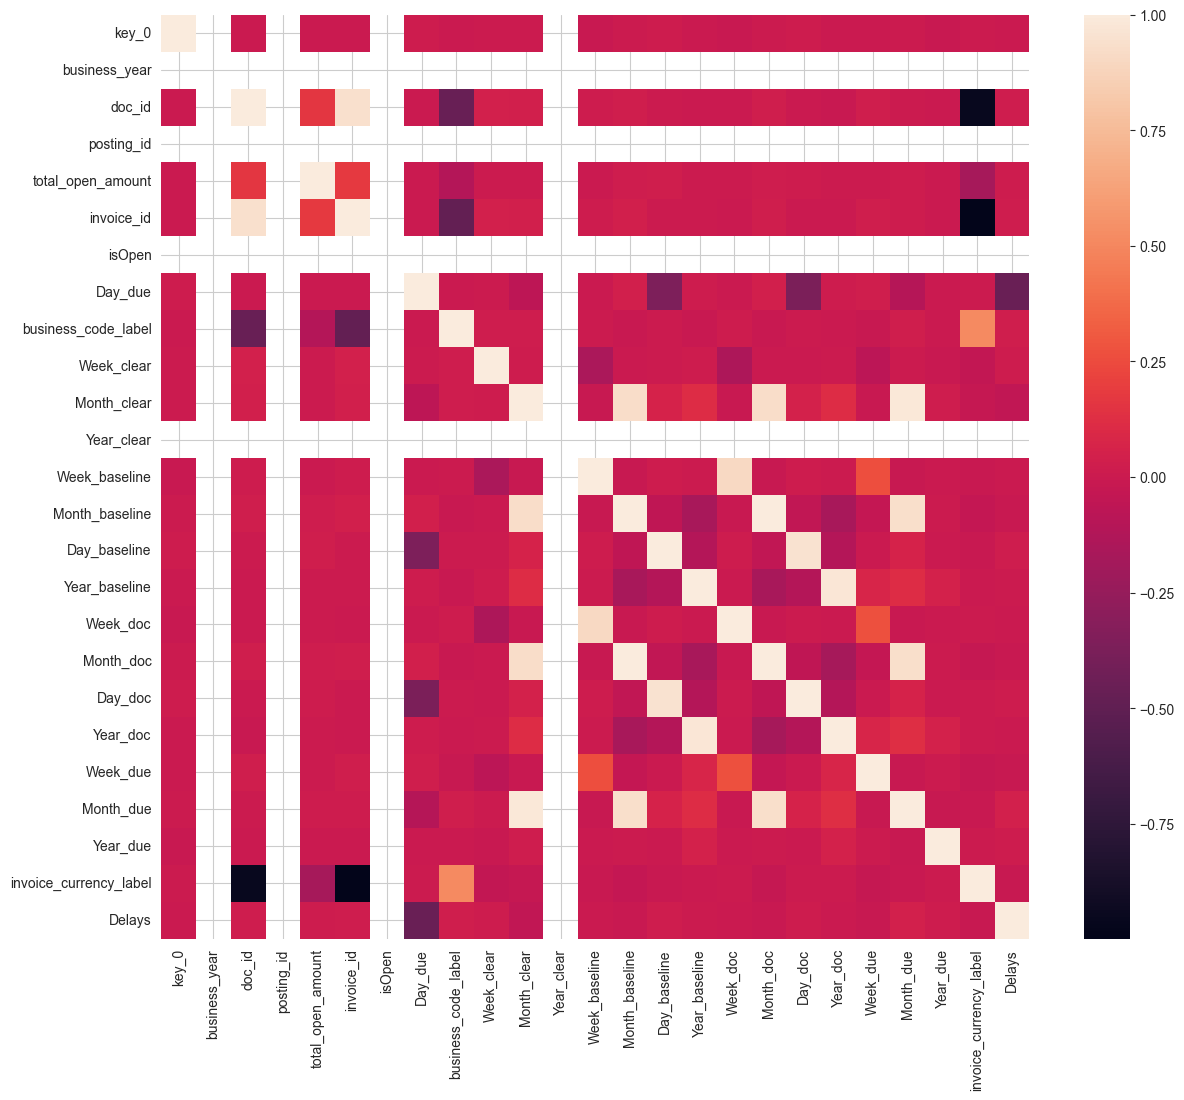

In [70]:
corrmat=X_train.merge(Y_train,on=X_train.index).corr()
plt.subplots(figsize=(14,12))
sns.heatmap(corrmat)

<Axes: title={'center': 'Pearson Correlation of features'}>

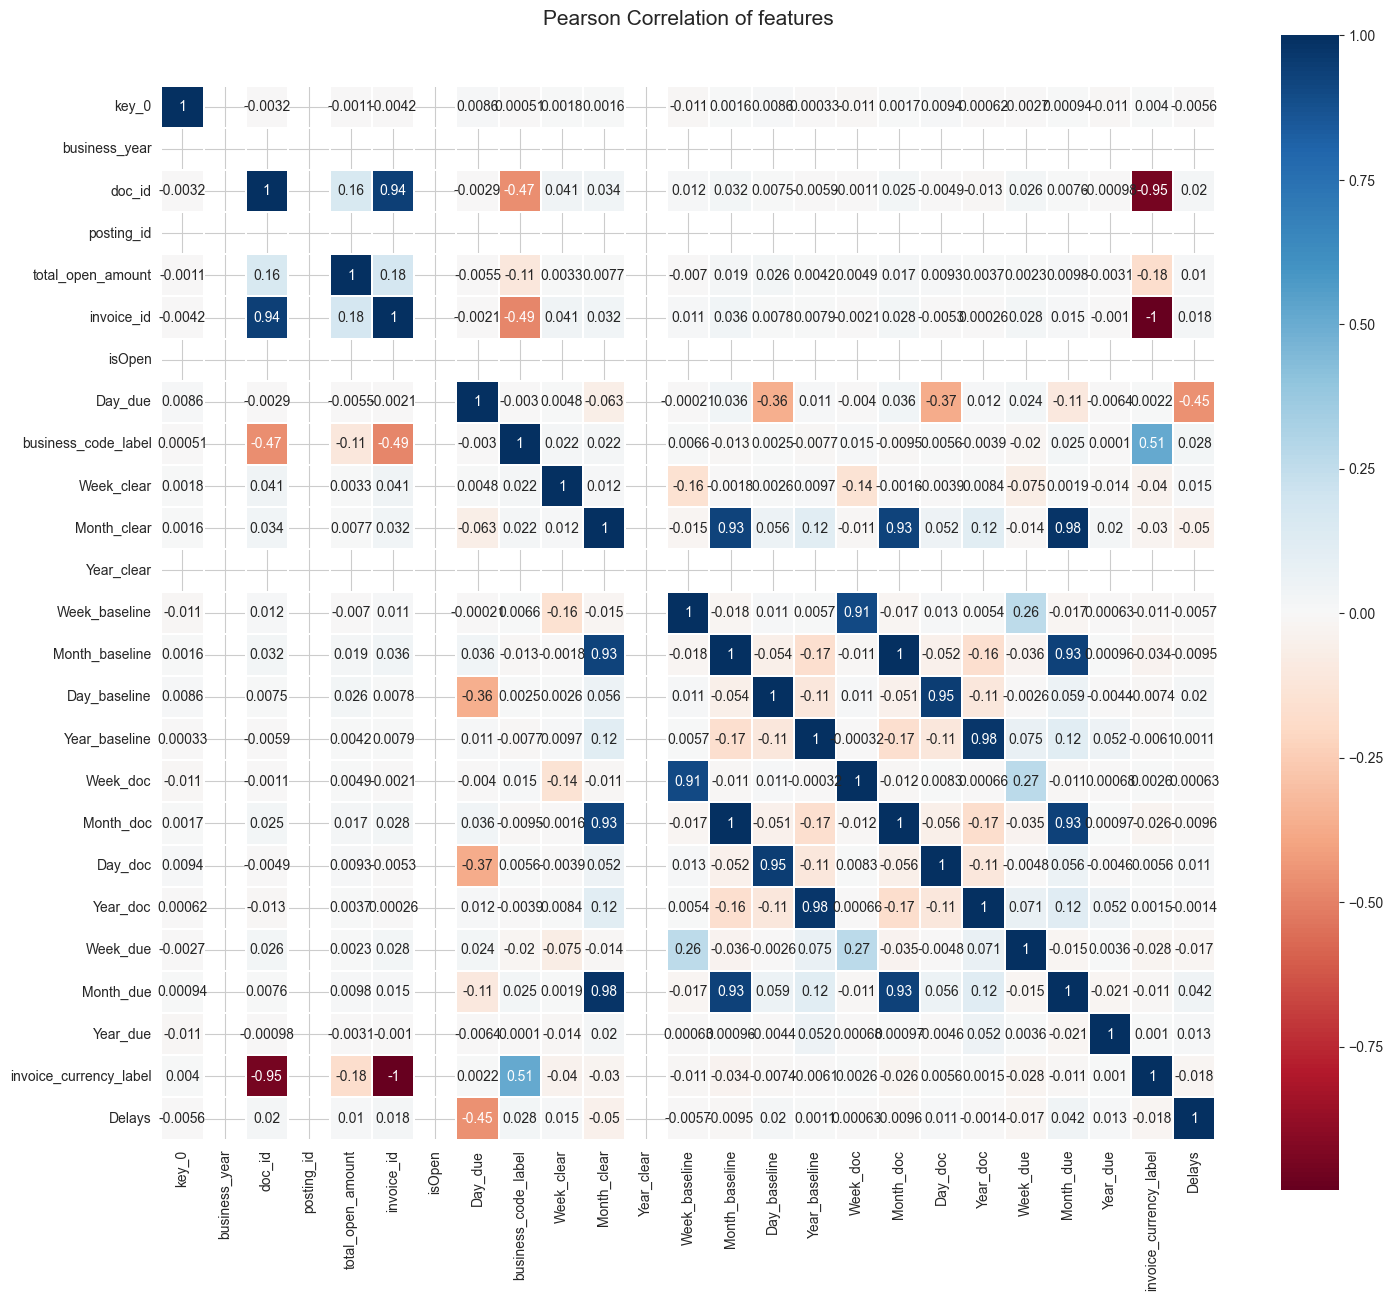

In [71]:
colormap=plt.cm.RdBu
plt.figure(figsize=(17,15))
plt.title("Pearson Correlation of features",y=1.05,size=15)
sns.heatmap(X_train.merge(Y_train,on=X_train.index).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

Correlation

In [72]:
def handling_correlation(df,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = X_train.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [73]:
handling_correlation(X_train.copy(),0.85)

['Week_doc',
 'invoice_id',
 'invoice_currency_label',
 'Month_baseline',
 'Month_due',
 'Day_doc',
 'Month_doc',
 'Year_doc']

Checking for no duplicate colum

In [74]:
duplicated_columns = X_train[X_train.duplicated()].index.values

In [75]:
duplicated_columns

array([], dtype=int64)

In [76]:
X_train.dtypes

business_year             float64
doc_id                    float64
posting_id                float64
total_open_amount         float64
invoice_id                float64
isOpen                      int64
Day_due                     int32
business_code_label         int32
Week_clear                  int32
Month_clear                 int32
Year_clear                  int32
Week_baseline               int32
Month_baseline              int32
Day_baseline                int32
Year_baseline               int32
Week_doc                    int32
Month_doc                   int32
Day_doc                     int32
Year_doc                    int32
Week_due                    int32
Month_due                   int32
Year_due                    int32
invoice_currency_label      int32
dtype: object

Constant feature

In [77]:
select=VarianceThreshold(threshold=0)
select.fit(X_train)

VarianceThreshold(threshold=0)

In [78]:
#not constant features
sum(select.get_support())

19

In [79]:
#constant features columns name
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[select.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[select.get_support()]]

4


['business_year', 'posting_id', 'isOpen', 'Year_clear']

In [80]:
#Quasi Constant
select=VarianceThreshold(threshold=0.01)
select.fit(X_train)
sum(select.get_support())

16

In [81]:
#quasi constant features columns name
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[select.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[select.get_support()]]

7


['business_year',
 'posting_id',
 'isOpen',
 'Year_clear',
 'Year_baseline',
 'Year_doc',
 'Year_due']

In [82]:
X_train.dtypes

business_year             float64
doc_id                    float64
posting_id                float64
total_open_amount         float64
invoice_id                float64
isOpen                      int64
Day_due                     int32
business_code_label         int32
Week_clear                  int32
Month_clear                 int32
Year_clear                  int32
Week_baseline               int32
Month_baseline              int32
Day_baseline                int32
Year_baseline               int32
Week_doc                    int32
Month_doc                   int32
Day_doc                     int32
Year_doc                    int32
Week_due                    int32
Month_due                   int32
Year_due                    int32
invoice_currency_label      int32
dtype: object

In [83]:
X_train,X_val,X_test=Feature_eng(['posting_id'])
X_train,X_val,X_test=Feature_eng(['Week_clear'])
X_train,X_val,X_test=Feature_eng(['Week_baseline'])
X_train,X_val,X_test=Feature_eng(['Day_baseline'])
X_train,X_val,X_test=Feature_eng(['Month_baseline'])
X_train,X_val,X_test=Feature_eng(['Year_baseline'])
X_train,X_val,X_test=Feature_eng(['Month_clear'])
X_train,X_val,X_test=Feature_eng(['Year_clear'])

In [84]:
X_train.dtypes

business_year             float64
doc_id                    float64
total_open_amount         float64
invoice_id                float64
isOpen                      int64
Day_due                     int32
business_code_label         int32
Week_doc                    int32
Month_doc                   int32
Day_doc                     int32
Year_doc                    int32
Week_due                    int32
Month_due                   int32
Year_due                    int32
invoice_currency_label      int32
dtype: object

### Modelling using Regression model

In [85]:
#Creating a list for displaying these values in table
#We are using mean square error and r2 as our metrics parameter
MSE_Score = []
R2_Score = []
Algorithm = []

1. Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [87]:
#fitting our model 
Algorithm.append('Linear Regression')
base_model=LinearRegression(fit_intercept=8)
base_model.fit(X_train,Y_train)

LinearRegression(fit_intercept=8)

In [88]:
X_train.columns

Index(['business_year', 'doc_id', 'total_open_amount', 'invoice_id', 'isOpen',
       'Day_due', 'business_code_label', 'Week_doc', 'Month_doc', 'Day_doc',
       'Year_doc', 'Week_due', 'Month_due', 'Year_due',
       'invoice_currency_label'],
      dtype='object')

In [89]:
predicted1=base_model.predict(X_test)
predicted1

array([-3.92400303, -3.87539146, -3.95231052, ...,  4.4298411 ,
        4.40926348,  6.98172332])

In [90]:
actual=Y_test
actual

36675    -2.0
24713    -5.0
49877     1.0
3174      2.0
37750     1.0
         ... 
22922    -3.0
46193     3.0
27436     3.0
31281    -1.0
11070    11.0
Name: Delays, Length: 5869, dtype: float64

In [91]:
mean_squared_error1=MSE_Score.append(mean_squared_error(Y_test,predicted1,squared=False))
mean_squared_error1

In [92]:
r2_score1=R2_Score.append(r2_score(Y_test,predicted1))
r2_score1

2. Decision Tree Regressor

In [93]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('Decision Tree Regressor')
tree_model=DecisionTreeRegressor(max_depth=2)
tree_model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=2)

In [94]:
predicted2=tree_model.predict(X_test)
predicted2

array([-0.3988397, -0.3988397, -0.3988397, ..., -0.3988397, -0.3988397,
       -0.3988397])

In [95]:
mean_squared_error2=MSE_Score.append(mean_squared_error(Y_test,predicted2,squared=False))
mean_squared_error2

In [96]:
r2_score2=R2_Score.append(r2_score(Y_test,predicted2))
r2_score2

3. Xgboost

In [98]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/70.9 MB 5.1 MB/s eta 0:00:14
   ---------------------------------------- 0.2/70.9 MB 3.0 MB/s eta 0:00:24
   ---------------------------------------- 0.6/70.9 MB 5.9 MB/s eta 0:00:12
    --------------------------------------- 1.1/70.9 MB 7.8 MB/s eta 0:00:09
    --------------------------------------- 1.7/70.9 MB 10.1 MB/s eta 0:00:07
   - -------------------------------------- 2.6/70.9 MB 11.7 MB/s eta 0:00:06
   -- ------------------------------------- 3.6/70.9 MB 14.3 MB/s eta 0:00:05
   -- ------------------------------------- 4.1/70.9 MB 14.6 MB/s eta 0:00:05
   -- ------------------------------------- 4.6/70.9 MB 14.0 MB/s eta 0:00:05
   -- --------------------

In [99]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
xgboost=xgb.XGBRegressor(max_depth=5)
xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [100]:
predicted3= xgboost.predict(X_test)
predicted3

array([-0.7274909, -0.3772904, -4.6237116, ...,  4.039857 ,  3.7693346,
        9.327646 ], dtype=float32)

In [101]:
Y_test

36675    -2.0
24713    -5.0
49877     1.0
3174      2.0
37750     1.0
         ... 
22922    -3.0
46193     3.0
27436     3.0
31281    -1.0
11070    11.0
Name: Delays, Length: 5869, dtype: float64

In [102]:
mean_squared_error3=MSE_Score.append(mean_squared_error(Y_test,predicted3,squared=False))
mean_squared_error3

In [103]:
r2_score3=R2_Score.append(r2_score(Y_test,predicted3))
r2_score3

4. Random Forest Regressor

In [104]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
random = RandomForestRegressor(max_depth=3)
random.fit(X_train, Y_train)

RandomForestRegressor(max_depth=3)

In [105]:
predicted4= random.predict(X_test)
predicted4

array([-2.89878592, -2.89878592, -2.89878592, ...,  0.2414449 ,
        0.2414449 ,  0.2414449 ])

In [106]:
mean_squared_error4=MSE_Score.append(mean_squared_error(Y_test,predicted4,squared=False))
mean_squared_error4

In [107]:
r2_score4=R2_Score.append(r2_score(Y_test,predicted4))
r2_score4

5. SVR

In [108]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
svr=SVR(C=3)
svr.fit(X_train, Y_train)

SVR(C=3)

In [109]:
predicted5= svr.predict(X_test)
predicted5

array([0.10157378, 0.10157527, 0.1015547 , ..., 0.10300026, 0.10301267,
       2.89994513])

In [110]:
mean_squared_error5=MSE_Score.append(mean_squared_error(Y_test,predicted5,squared=False))
mean_squared_error5

In [111]:
r2_score5=R2_Score.append(r2_score(Y_test,predicted5))
r2_score5

In [112]:
#Creating a dataframe to display the comparision between all these models.
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [113]:
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,8.606373,0.045407
1,Decision Tree Regressor,7.718232,0.232261
2,XGB Regressor,8.656919,0.034161
3,Random Forest Regressor,7.837780,0.208294
4,Support Vector Regression,8.856916,-0.010981


We can see that XGBoost has good r2 score than any other model.

In [114]:
X_main_test = main_test.drop(['clear_date'],axis=1)
X_main_test

,business_code,cust_number,name_customer,business_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Day_due,Day_clear,Delays
24468,U001,0200706844,WINC co,2020.0,1.930571e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,1.0,8734.71,2020-02-27,NAA8,1.930571e+09,1,13,NaN,NaN
10250,U001,0200915438,GROC foundation,2020.0,1.930565e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,USD,RV,1.0,8761.37,2020-02-27,NAA8,1.930565e+09,1,13,NaN,NaN
11953,U001,0200777735,NASH foundation,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-02-27,2020-03-13,USD,RV,1.0,44194.05,2020-02-27,NAA8,1.930581e+09,1,13,NaN,NaN
40290,U001,0200706844,WINC llc,2020.0,1.930579e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,79238.44,2020-02-27,NAA8,1.930579e+09,1,13,NaN,NaN
25525,U001,0200783609,PROFIC corporation,2020.0,1.930566e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,USD,RV,1.0,9665.47,2020-02-27,NAA8,1.930566e+09,1,13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39317,U001,0200763229,MAINES in,2020.0,1.930915e+09,2020-05-18,2020-05-18,2020-05-18,2020-06-02,USD,RV,1.0,21362.82,2020-05-18,NAA8,1.930915e+09,1,2,NaN,NaN
4543,CA02,0140105785,SHOPPE in,2020.0,2.960636e+09,2020-05-19,2020-05-19,2020-05-19,2020-05-29,CAD,RV,1.0,1373.60,2020-05-19,CA10,2.960636e+09,1,29,NaN,NaN
19816,U001,0200915438,GROC in,2020.0,1.930914e+09,2020-05-20,2020-05-18,2020-05-20,2020-06-04,USD,RV,1.0,9884.00,2020-05-20,NAA8,1.930914e+09,1,4,NaN,NaN
14671,U001,0200756072,REINHA in,2020.0,1.930926e+09,2020-05-21,2020-05-21,2020-05-21,2020-06-20,USD,RV,1.0,8.00,2020-05-21,NAD5,1.930926e+09,1,20,NaN,NaN


In [115]:
main_test =main_test.drop(['clear_date'],axis=1)


In [116]:
X_main_test.columns

Index(['business_code', 'cust_number', 'name_customer', 'business_year',
       'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen',
       'Day_due', 'Day_clear', 'Delays'],
      dtype='object')

In [117]:
X_train.columns

Index(['business_year', 'doc_id', 'total_open_amount', 'invoice_id', 'isOpen',
       'Day_due', 'business_code_label', 'Week_doc', 'Month_doc', 'Day_doc',
       'Year_doc', 'Week_due', 'Month_due', 'Year_due',
       'invoice_currency_label'],
      dtype='object')

In [118]:
temp = set(X_main_test['business_code'])-set(bussi_code.classes_)
for items in temp:
    bussi_code.classes_= np.append(bussi_code.classes_,items)

X_main_test['business_code_label'] = bussi_code.transform(X_main_test['business_code'])

In [119]:
temp2 = set(X_main_test['invoice_currency'])-set(invoice.classes_)
for items in temp2:
    invoice.classes_= np.append(invoice.classes_,items)
    
X_main_test['invoice_currency_label'] = invoice.transform(X_main_test['invoice_currency'])

In [120]:
X_main_test['Day_doc']=X_main_test['document_create_date.1'].dt.day

In [121]:
X_main_test['Year_doc']=X_main_test['document_create_date.1'].dt.year

In [122]:
X_main_test['Year_due']=X_main_test['due_in_date'].dt.year
X_main_test['Month_due']=X_main_test['due_in_date'].dt.month
X_main_test['Week_due']=X_main_test['due_in_date'].dt.weekday
#X_main_test['Year_clear']=X_main_test['clear_date'].dt.year
X_main_test['Week_doc'] = X_main_test['document_create_date.1'].dt.weekday
X_main_test['Day_doc'] = X_main_test['document_create_date.1'].dt.day
X_main_test['Month_doc'] = X_main_test['document_create_date.1'].dt.month
X_main_test['Year_doc'] = X_main_test['document_create_date.1'].dt.year

In [123]:
X_main_test=X_main_test.drop(['business_code'],axis=1)
X_main_test=X_main_test.drop(['document_create_date.1'],axis=1)
X_main_test=X_main_test.drop(['document_create_date'],axis=1)
X_main_test=X_main_test.drop(['due_in_date'],axis=1)
X_main_test=X_main_test.drop(['posting_date'],axis=1)
X_main_test=X_main_test.drop(['document type'],axis=1)
X_main_test=X_main_test.drop(['baseline_create_date'],axis=1)
#main_test=main_test.drop(['clear_date'],axis=1)
X_main_test=X_main_test.drop(['invoice_currency'],axis=1)
#main_test=main_test.drop(['Year_clear'],axis=1)
X_main_test=X_main_test.drop(['Day_clear'],axis=1)
X_main_test=X_main_test.drop(['Delays'],axis=1)
#X_main_test=X_main_test.drop(['invoice_id'],axis=1)
X_main_test=X_main_test.drop(['posting_id'],axis=1)
X_main_test=X_main_test.drop(['cust_number'],axis=1)
X_main_test=X_main_test.drop(['name_customer'],axis=1)
X_main_test=X_main_test.drop(['cust_payment_terms'],axis=1)

In [124]:
X_main_test.columns

Index(['business_year', 'doc_id', 'total_open_amount', 'invoice_id', 'isOpen',
       'Day_due', 'business_code_label', 'invoice_currency_label', 'Day_doc',
       'Year_doc', 'Year_due', 'Month_due', 'Week_due', 'Week_doc',
       'Month_doc'],
      dtype='object')

In [125]:
X_train.columns

Index(['business_year', 'doc_id', 'total_open_amount', 'invoice_id', 'isOpen',
       'Day_due', 'business_code_label', 'Week_doc', 'Month_doc', 'Day_doc',
       'Year_doc', 'Week_due', 'Month_due', 'Year_due',
       'invoice_currency_label'],
      dtype='object')

In [127]:
final_result = xgboost.predict(X_main_test)

ValueError: feature_names mismatch: ['business_year', 'doc_id', 'total_open_amount', 'invoice_id', 'isOpen', 'Day_due', 'business_code_label', 'Week_doc', 'Month_doc', 'Day_doc', 'Year_doc', 'Week_due', 'Month_due', 'Year_due', 'invoice_currency_label'] ['business_year', 'doc_id', 'total_open_amount', 'invoice_id', 'isOpen', 'Day_due', 'business_code_label', 'invoice_currency_label', 'Day_doc', 'Year_doc', 'Year_due', 'Month_due', 'Week_due', 'Week_doc', 'Month_doc']

In [128]:
final_result = pd.Series(final_result,name='Delay_predict')

NameError: name 'final_result' is not defined

In [ ]:
main_test.reset_index(drop=True,inplace=True)

In [ ]:
Final = main_test.merge(final_result , on = X_main_test.index )
Final

,key_0,business_code,cust_number,name_customer,business_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Day_due,Day_clear,Delays,Delay_predict
0,24468,U001,0200706844,WINC co,2020.0,1.930571e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,...,1.0,8734.71,2020-02-27,NAA8,1.930571e+09,1,13,NaN,NaN,1.741796
1,10250,U001,0200915438,GROC foundation,2020.0,1.930565e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,...,1.0,8761.37,2020-02-27,NAA8,1.930565e+09,1,13,NaN,NaN,1.741796
2,11953,U001,0200777735,NASH foundation,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-02-27,2020-03-13,...,1.0,44194.05,2020-02-27,NAA8,1.930581e+09,1,13,NaN,NaN,1.990331
3,40290,U001,0200706844,WINC llc,2020.0,1.930579e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,...,1.0,79238.44,2020-02-27,NAA8,1.930579e+09,1,13,NaN,NaN,3.691509
4,25525,U001,0200783609,PROFIC corporation,2020.0,1.930566e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,...,1.0,9665.47,2020-02-27,NAA8,1.930566e+09,1,13,NaN,NaN,1.849009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,39317,U001,0200763229,MAINES in,2020.0,1.930915e+09,2020-05-18,2020-05-18,2020-05-18,2020-06-02,...,1.0,21362.82,2020-05-18,NAA8,1.930915e+09,1,2,NaN,NaN,12.719199
9696,4543,CA02,0140105785,SHOPPE in,2020.0,2.960636e+09,2020-05-19,2020-05-19,2020-05-19,2020-05-29,...,1.0,1373.60,2020-05-19,CA10,2.960636e+09,1,29,NaN,NaN,-9.180079
9697,19816,U001,0200915438,GROC in,2020.0,1.930914e+09,2020-05-20,2020-05-18,2020-05-20,2020-06-04,...,1.0,9884.00,2020-05-20,NAA8,1.930914e+09,1,4,NaN,NaN,20.142347
9698,14671,U001,0200756072,REINHA in,2020.0,1.930926e+09,2020-05-21,2020-05-21,2020-05-21,2020-06-20,...,1.0,8.00,2020-05-21,NAD5,1.930926e+09,1,20,NaN,NaN,4.463508


In [ ]:
Final['Delay_predict']=Final['Delay_predict'].astype(int)

In [ ]:
Final['Payment_date_predict']=Final['due_in_date']+pd.to_timedelta(Final['Delay_predict'],unit='d')

In [ ]:
Final

,key_0,business_code,cust_number,name_customer,business_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Day_due,Day_clear,Delays,Delay_predict,Payment_date_predict
0,24468,U001,0200706844,WINC co,2020.0,1.930571e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,...,8734.71,2020-02-27,NAA8,1.930571e+09,1,13,NaN,NaN,1,2020-03-14
1,10250,U001,0200915438,GROC foundation,2020.0,1.930565e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,...,8761.37,2020-02-27,NAA8,1.930565e+09,1,13,NaN,NaN,1,2020-03-14
2,11953,U001,0200777735,NASH foundation,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-02-27,2020-03-13,...,44194.05,2020-02-27,NAA8,1.930581e+09,1,13,NaN,NaN,1,2020-03-14
3,40290,U001,0200706844,WINC llc,2020.0,1.930579e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,...,79238.44,2020-02-27,NAA8,1.930579e+09,1,13,NaN,NaN,3,2020-03-16
4,25525,U001,0200783609,PROFIC corporation,2020.0,1.930566e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,...,9665.47,2020-02-27,NAA8,1.930566e+09,1,13,NaN,NaN,1,2020-03-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,39317,U001,0200763229,MAINES in,2020.0,1.930915e+09,2020-05-18,2020-05-18,2020-05-18,2020-06-02,...,21362.82,2020-05-18,NAA8,1.930915e+09,1,2,NaN,NaN,12,2020-06-14
9696,4543,CA02,0140105785,SHOPPE in,2020.0,2.960636e+09,2020-05-19,2020-05-19,2020-05-19,2020-05-29,...,1373.60,2020-05-19,CA10,2.960636e+09,1,29,NaN,NaN,-9,2020-05-20
9697,19816,U001,0200915438,GROC in,2020.0,1.930914e+09,2020-05-20,2020-05-18,2020-05-20,2020-06-04,...,9884.00,2020-05-20,NAA8,1.930914e+09,1,4,NaN,NaN,20,2020-06-24
9698,14671,U001,0200756072,REINHA in,2020.0,1.930926e+09,2020-05-21,2020-05-21,2020-05-21,2020-06-20,...,8.00,2020-05-21,NAD5,1.930926e+09,1,20,NaN,NaN,4,2020-06-24


In [ ]:
Final=Final.drop(['Day_clear'],axis=1)
Final=Final.drop(['Delays'],axis=1)

In [ ]:
Final

,key_0,business_code,cust_number,name_customer,business_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Day_due,Delay_predict,Payment_date_predict
0,24468,U001,0200706844,WINC co,2020.0,1.930571e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,...,RV,1.0,8734.71,2020-02-27,NAA8,1.930571e+09,1,13,1,2020-03-14
1,10250,U001,0200915438,GROC foundation,2020.0,1.930565e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,...,RV,1.0,8761.37,2020-02-27,NAA8,1.930565e+09,1,13,1,2020-03-14
2,11953,U001,0200777735,NASH foundation,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-02-27,2020-03-13,...,RV,1.0,44194.05,2020-02-27,NAA8,1.930581e+09,1,13,1,2020-03-14
3,40290,U001,0200706844,WINC llc,2020.0,1.930579e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,...,RV,1.0,79238.44,2020-02-27,NAA8,1.930579e+09,1,13,3,2020-03-16
4,25525,U001,0200783609,PROFIC corporation,2020.0,1.930566e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,...,RV,1.0,9665.47,2020-02-27,NAA8,1.930566e+09,1,13,1,2020-03-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,39317,U001,0200763229,MAINES in,2020.0,1.930915e+09,2020-05-18,2020-05-18,2020-05-18,2020-06-02,...,RV,1.0,21362.82,2020-05-18,NAA8,1.930915e+09,1,2,12,2020-06-14
9696,4543,CA02,0140105785,SHOPPE in,2020.0,2.960636e+09,2020-05-19,2020-05-19,2020-05-19,2020-05-29,...,RV,1.0,1373.60,2020-05-19,CA10,2.960636e+09,1,29,-9,2020-05-20
9697,19816,U001,0200915438,GROC in,2020.0,1.930914e+09,2020-05-20,2020-05-18,2020-05-20,2020-06-04,...,RV,1.0,9884.00,2020-05-20,NAA8,1.930914e+09,1,4,20,2020-06-24
9698,14671,U001,0200756072,REINHA in,2020.0,1.930926e+09,2020-05-21,2020-05-21,2020-05-21,2020-06-20,...,RV,1.0,8.00,2020-05-21,NAD5,1.930926e+09,1,20,4,2020-06-24


In [ ]:
bins= [-30,0,10,50]
labels = ['Bucket1','Bucket2','Bucket3']
Final['Aging_bucket'] = pd.cut(Final['Delay_predict'], bins=bins, labels=labels, right=False)

In [ ]:
Final

,key_0,business_code,cust_number,name_customer,business_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Day_due,Delay_predict,Payment_date_predict,Aging_bucket
0,24468,U001,0200706844,WINC co,2020.0,1.930571e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,...,1.0,8734.71,2020-02-27,NAA8,1.930571e+09,1,13,1,2020-03-14,Bucket2
1,10250,U001,0200915438,GROC foundation,2020.0,1.930565e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,...,1.0,8761.37,2020-02-27,NAA8,1.930565e+09,1,13,1,2020-03-14,Bucket2
2,11953,U001,0200777735,NASH foundation,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-02-27,2020-03-13,...,1.0,44194.05,2020-02-27,NAA8,1.930581e+09,1,13,1,2020-03-14,Bucket2
3,40290,U001,0200706844,WINC llc,2020.0,1.930579e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,...,1.0,79238.44,2020-02-27,NAA8,1.930579e+09,1,13,3,2020-03-16,Bucket2
4,25525,U001,0200783609,PROFIC corporation,2020.0,1.930566e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,...,1.0,9665.47,2020-02-27,NAA8,1.930566e+09,1,13,1,2020-03-14,Bucket2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,39317,U001,0200763229,MAINES in,2020.0,1.930915e+09,2020-05-18,2020-05-18,2020-05-18,2020-06-02,...,1.0,21362.82,2020-05-18,NAA8,1.930915e+09,1,2,12,2020-06-14,Bucket3
9696,4543,CA02,0140105785,SHOPPE in,2020.0,2.960636e+09,2020-05-19,2020-05-19,2020-05-19,2020-05-29,...,1.0,1373.60,2020-05-19,CA10,2.960636e+09,1,29,-9,2020-05-20,Bucket1
9697,19816,U001,0200915438,GROC in,2020.0,1.930914e+09,2020-05-20,2020-05-18,2020-05-20,2020-06-04,...,1.0,9884.00,2020-05-20,NAA8,1.930914e+09,1,4,20,2020-06-24,Bucket3
9698,14671,U001,0200756072,REINHA in,2020.0,1.930926e+09,2020-05-21,2020-05-21,2020-05-21,2020-06-20,...,1.0,8.00,2020-05-21,NAD5,1.930926e+09,1,20,4,2020-06-24,Bucket2


In [ ]:
Final['Aging_bucket'].value_counts()

Bucket2    6246
Bucket1    2208
Bucket3    1246
Name: Aging_bucket, dtype: int64

In [ ]:
Final

,key_0,business_code,cust_number,name_customer,business_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Day_due,Delay_predict,Payment_date_predict,Aging_bucket
0,24468,U001,0200706844,WINC co,2020.0,1.930571e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,...,1.0,8734.71,2020-02-27,NAA8,1.930571e+09,1,13,1,2020-03-14,Bucket2
1,10250,U001,0200915438,GROC foundation,2020.0,1.930565e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,...,1.0,8761.37,2020-02-27,NAA8,1.930565e+09,1,13,1,2020-03-14,Bucket2
2,11953,U001,0200777735,NASH foundation,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-02-27,2020-03-13,...,1.0,44194.05,2020-02-27,NAA8,1.930581e+09,1,13,1,2020-03-14,Bucket2
3,40290,U001,0200706844,WINC llc,2020.0,1.930579e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,...,1.0,79238.44,2020-02-27,NAA8,1.930579e+09,1,13,3,2020-03-16,Bucket2
4,25525,U001,0200783609,PROFIC corporation,2020.0,1.930566e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,...,1.0,9665.47,2020-02-27,NAA8,1.930566e+09,1,13,1,2020-03-14,Bucket2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,39317,U001,0200763229,MAINES in,2020.0,1.930915e+09,2020-05-18,2020-05-18,2020-05-18,2020-06-02,...,1.0,21362.82,2020-05-18,NAA8,1.930915e+09,1,2,12,2020-06-14,Bucket3
9696,4543,CA02,0140105785,SHOPPE in,2020.0,2.960636e+09,2020-05-19,2020-05-19,2020-05-19,2020-05-29,...,1.0,1373.60,2020-05-19,CA10,2.960636e+09,1,29,-9,2020-05-20,Bucket1
9697,19816,U001,0200915438,GROC in,2020.0,1.930914e+09,2020-05-20,2020-05-18,2020-05-20,2020-06-04,...,1.0,9884.00,2020-05-20,NAA8,1.930914e+09,1,4,20,2020-06-24,Bucket3
9698,14671,U001,0200756072,REINHA in,2020.0,1.930926e+09,2020-05-21,2020-05-21,2020-05-21,2020-06-20,...,1.0,8.00,2020-05-21,NAD5,1.930926e+09,1,20,4,2020-06-24,Bucket2


In [ ]:
from IPython.display import FileLink, FileLinks

Final.to_csv('C:\HighRadius\data2.csv', index=False)